## CMPINF 2100 Week 12
### Introduction to fitting LOGISTIC REGRESSION with statsmodels
Logistic regression is a model type for BINARY CLASSIFICATION.

However, logistic regression is a GENERALIZED LINEAR MODEL (GLM). Therefore, almost everything from Linear Models (LM)
applies!!

We can use everything about creating features, additive features, non-linear features derived inputs.

There are several key differences which we will learn about next week.
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Read data

In [3]:
df = pd.read_csv("week_11_intro_binary_classification.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [5]:
df.nunique()

x    115
y      2
dtype: int64

In [6]:
df.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


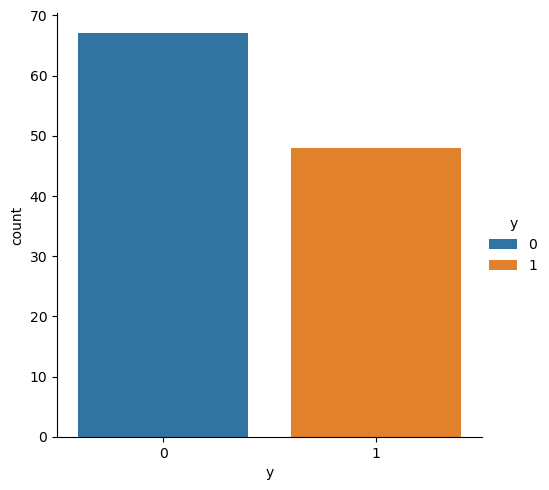

In [8]:
sns.catplot(data=df, x="y", kind="count", hue="y")
plt.show()

In [9]:
df.describe()

,x,y
count,115.000000,115.000000
mean,0.019188,0.417391
std,1.001227,0.495287
min,-2.059272,0.000000
25%,-0.721905,0.000000
50%,0.114752,0.000000
75%,0.570510,1.000000
max,2.438859,1.000000


In [10]:
df.y.mean()

0.41739130434782606

In [11]:
df.y.value_counts(normalize=True)

y
0    0.582609
1    0.417391
Name: proportion, dtype: float64

The INPUT is CONTINUOUS.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


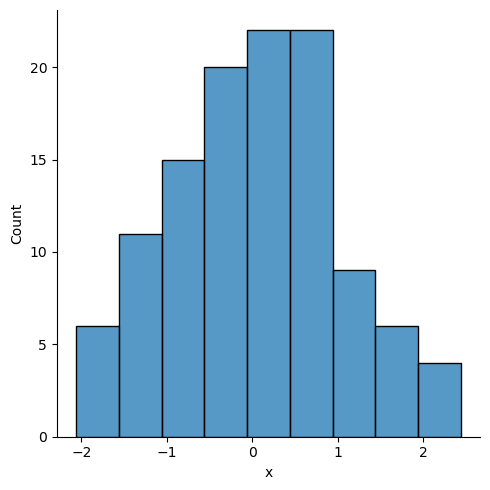

In [12]:
sns.displot(data=df, x="x", kind="hist")

plt.show()

How does the continuous input RELATE to the categorical output????

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


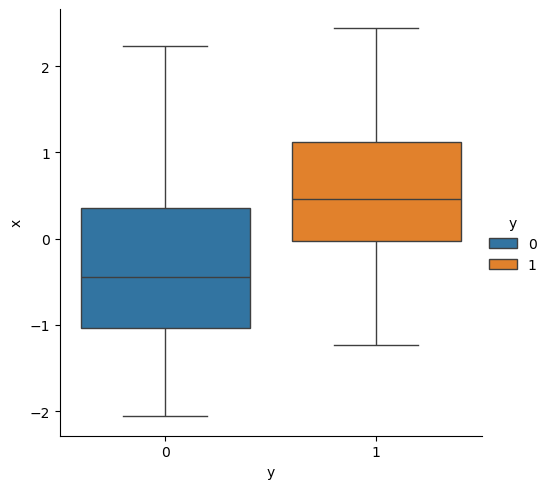

In [14]:
sns.catplot(data=df, x="y", y="x", hue="y", kind="box")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


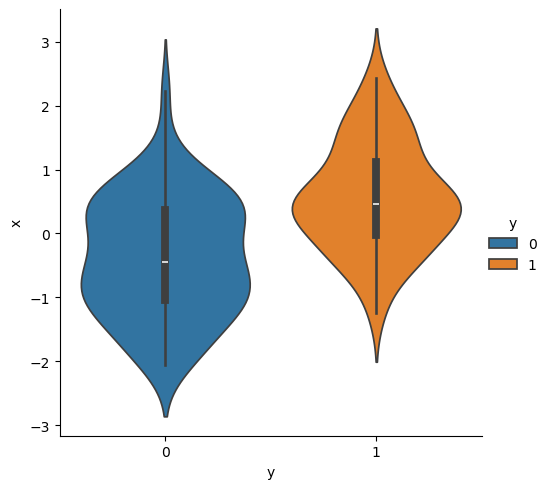

In [17]:
sns.catplot(data=df, x="y", y="x", kind="violin", hue="y")
plt.show()

What is the AVERAGE continuous INPUT **GIVEN** the Binary output???

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


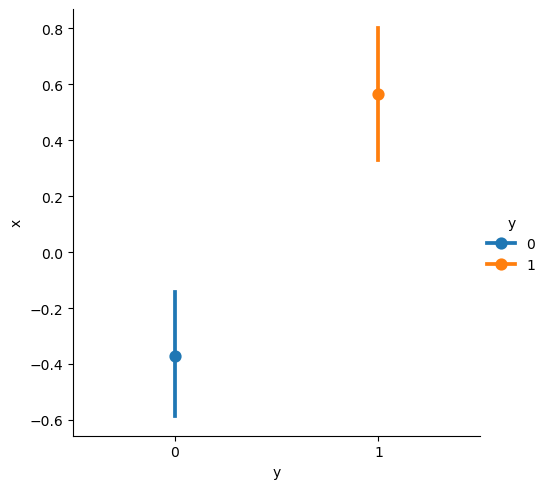

In [18]:
sns.catplot(data=df, x="y", y="x", kind="point", hue="y")
plt.show()

On average, there seems to be a DIFFERENCE in the INPUT when the EVENT is observed!!!

The visual exploration suggets that the INPUT is RELATED to the BINARY OUTPUT!!!

## Logistic Regression
The syntax for fitting a logistic regression model for BINARY CLASSIFICATION is very similar to that for the linear model for regression!!

HOWEVER, we must TELL statsmodels this is a logistic regression problem and NOT regression!!!

In [19]:
fit_glm = smf.logit(formula="y ~ x", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


In [20]:
fit_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.1756
Time:                        23:28:42   Log-Likelihood:                -64.411
converged:                       True   LL-Null:                       -78.135
Covariance Type:            nonrobust   LLR p-value:                 1.614e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4495      0.218     -2.062      0.039      -0.877      -0.022
x              1.1838      0.267      4.432      0.000       0.660       1.707
==============================================================================
"""

Lets see what happens if we would MISTAKENLY fit the LINEAR MODEL for regression!!!

In [21]:
fit_ols = smf.ols(formula="y ~ x", data=df).fit()

In [22]:
fit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     30.84
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.88e-07
Time:                        23:30:00   Log-Likelihood:                -68.001
No. Observations:                 115   AIC:                             140.0
Df Residuals:                     113   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4130      0.041     10.042      0.000       0.332       0.494
x              0.2290      0.041      5.553      0.000       0.147       0.311
==============================================================================
Omnibus:                       45.427   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.541
Skew:                           0.152   Prob(JB):                       0.0230
Kurtosis:                       1.783   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

But because logistic regression is  GENERALIZED LINEAR MODEL, many of the interpretations concepts still apply!!!

In [23]:
fit_glm.params

Intercept   -0.449518
x            1.183814
dtype: float64

In [24]:
fit_glm.bse

Intercept    0.218009
x            0.267133
dtype: float64

In [25]:
fit_glm.pvalues

Intercept    0.039215
x            0.000009
dtype: float64

In [26]:
fit_glm.conf_int()

,0,1
Intercept,-0.876808,-0.022228
x,0.660243,1.707385


In [27]:
fit_glm.pvalues < 0.05

Intercept    True
x            True
dtype: bool

In [28]:
def my_coefplot(mod, figsize_use=(10,4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar(y=mod.params.index,
               x=mod.params,
               xerr=2*mod.bse, fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle="--", linewidth=3.5, color="grey")

    ax.set_xlabel("coefficient value")

    plt.show()

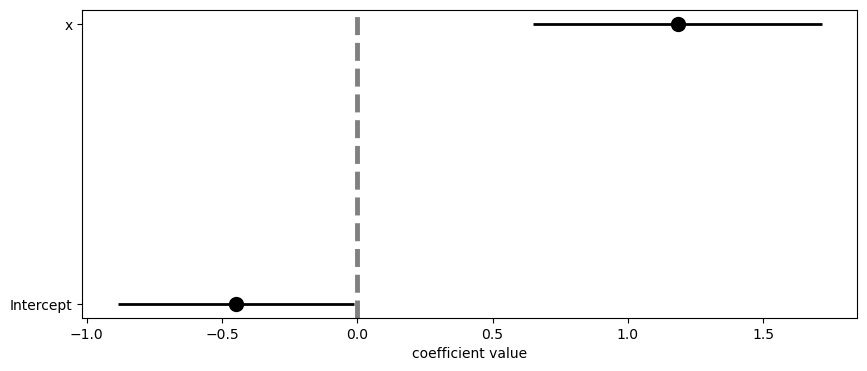

In [29]:
my_coefplot(fit_glm)

The DIFFERENCE between the interpretation of the logistic regression SLOPE vs the "Regular" linear model SLOPE is that...the logistic regression slope is **NOT** how much the AVERAGE OUTPUT changes due to a one unit change of the INPUT!!!!

The slope is how much the LOG-ODDS RATIO CHANGES as the input changes 1 unit!!!!

## Predictions
Fundamentally we are predicting the EVENT PROBABILITY!!!

The .predict() method therefore returns the predicted probability!!

Define a VISUALIZATION GRID between a VERY NEGATIVE INPUT and a VERY POSITIVE INPUT.

In [30]:
df.describe()

,x,y
count,115.000000,115.000000
mean,0.019188,0.417391
std,1.001227,0.495287
min,-2.059272,0.000000
25%,-0.721905,0.000000
50%,0.114752,0.000000
75%,0.570510,1.000000
max,2.438859,1.000000


Lets use a lower bound of -5 and upper bound of 5 for the input in the visualization grid.

In [31]:
input_grid = pd.DataFrame({"x": np.linspace(-5, 5, num=251)})

In [32]:
input_grid

,x
0,-5.00
1,-4.96
2,-4.92
3,-4.88
4,-4.84
...,...
246,4.84
247,4.88
248,4.92
249,4.96


Define a copy of the input grid.

In [33]:
df_viz = input_grid.copy()

Include a new column for the PREDICTED PROBABILITY from the logistic regression model!!!

In [34]:
df_viz["pred_probability"] = fit_glm.predict(input_grid)

In [35]:
df_viz

,x,pred_probability
0,-5.00,0.001712
1,-4.96,0.001794
2,-4.92,0.001881
3,-4.88,0.001972
4,-4.84,0.002068
...,...,...
246,4.84,0.994934
247,4.88,0.995167
248,4.92,0.995390
249,4.96,0.995602


In [36]:
df_viz.describe()

,x,pred_probability
count,251.000000,251.000000
mean,0.000000,0.462384
std,2.904066,0.406932
min,-5.000000,0.001712
25%,-2.500000,0.032022
50%,0.000000,0.389475
75%,2.500000,0.924824
max,5.000000,0.995805


Visualize the predicted probability with repsect to the INPUT in the visualization grid.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


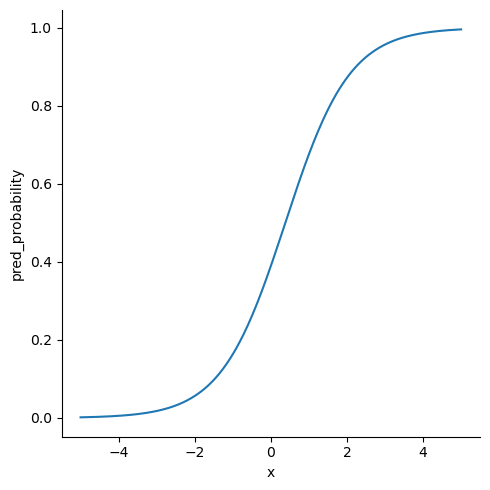

In [37]:
sns.relplot(data=df_viz, x="x", y="pred_probability", kind="line")

plt.show()

Why does this matter?

What happens if we MISTAKENLY fit the REGULAR linear model???

In [38]:
fit_ols.params

Intercept    0.412996
x            0.229045
dtype: float64

In [39]:
fit_ols.bse

Intercept    0.041125
x            0.041247
dtype: float64

In [40]:
fit_ols.pvalues

Intercept    2.405283e-17
x            1.884900e-07
dtype: float64

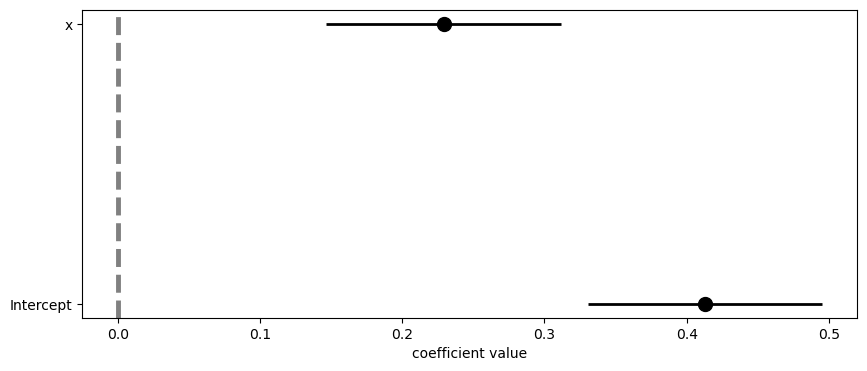

In [41]:
my_coefplot(fit_ols)

Predict with the incorrect linear model.

In [42]:
df_viz["pred_from_ols"] = fit_ols.predict(input_grid)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


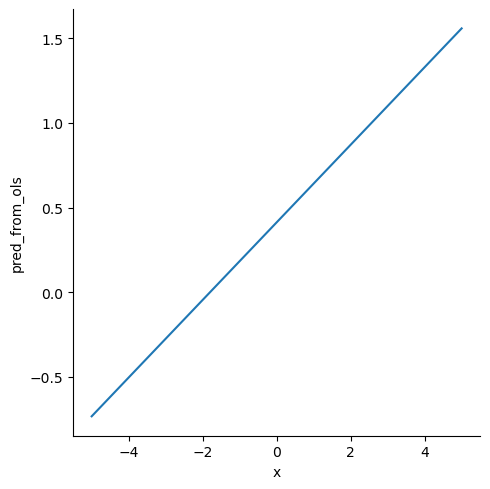

In [43]:
sns.relplot(data=df_viz, x="x", y="pred_from_ols", kind="line")

plt.show()

## Visually explore the logistic trends
The sns.lmplot function allows you to visualize the logistic regression fit!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


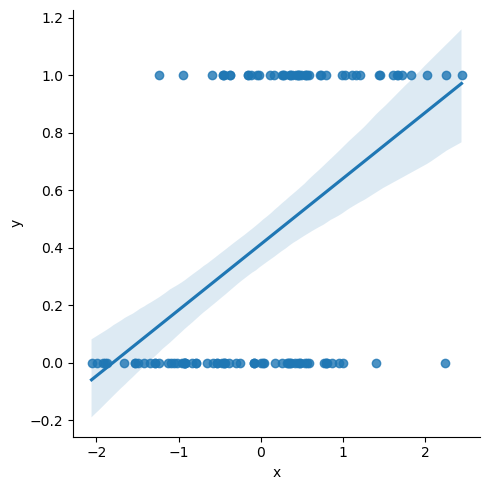

In [44]:
sns.lmplot(data=df, x="x", y="y")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


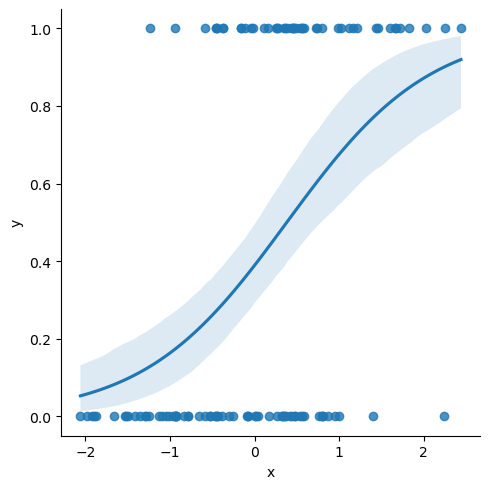

In [45]:
sns.lmplot(data=df, x="x", y="y", logistic=True)

plt.show()